## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [2]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2020-11-17 16:17:41--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2020-11-17 16:17:41--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc827fdc192ec6a18f4713c508bb.dl.dropboxusercontent.com/cd/0/inline/BDaX08t8ElfRVv5MF2eU_LLVwKM0WjZ9KffXHfIP8apCeki52sLecANbwsYI75rKja8iHTaxCcp7gj22vADsZUBOEvLzZo9NzkRX0x9OWALRglFObEAPGXHLhjRQ2FSuYpk/file# [following]
--2020-11-17 16:17:41--  https://uc827fdc192ec6a18f4713c508bb.dl.dropboxusercontent.com/cd/0/inline/BDaX08t8ElfRVv5MF2eU_LLVwKM0WjZ9KffXHfIP8apCeki52sLecANbwsYI75rKja8iHTaxCcp7gj22vADsZUBOEvLzZo9NzkRX0x

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger than 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [13]:
import pandas as pd
import numpy as np

#POINT (1)
N=1310720
file_name="data_000637.txt"
data=pd.read_csv(file_name, nrows=N)

data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Head è il numero di conti

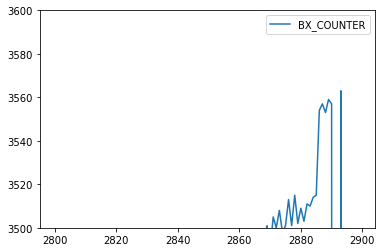

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

pdf=pd.DataFrame(data['BX_COUNTER'],index=range(2800,2900))
pdf.plot(); plt.legend(loc='best')
#plt.xlim(2800,2900)
plt.ylim(3500,3600)
plt.show()

In [5]:
#print( data["ORBIT_CNT"])
df=data.sort_values(by="ORBIT_CNT")
n=0;
print(data[40:45])
for i in range(len(data)): 
    if df["ORBIT_CNT"][i]==3869200167: n+=1;
    else: break;
print()
print("x=",n)        

    HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
40     1     0           54  3869200167        3184        28
41     1     0           56  3869200167        3177        20
42     1     0           57  3869200167        3187        17
43     1     1            1  3869200168           7        18
44     1     0           64  3869200168           7        16

x= 43


In [6]:
#POINT (2): every X bx_cnt, orbit_cnt is increased by 1
bx_max=data['BX_COUNTER'].max()+1  #the number of bx_counts is the max+1 (like mins)
#loc prints all the feat-values of a precise feature
print(data['BX_COUNTER'].idxmax(), "\n", data.loc[data['BX_COUNTER'].idxmax()])
print(bx_max)

2893 
 HEAD                    1
FPGA                    0
TDC_CHANNEL            45
ORBIT_CNT      3869200195
BX_COUNTER           3563
TDC_MEAS               29
Name: 2893, dtype: int64
3564


In [7]:
#POINT (3)
#1 orbit = 3564 bx counters
#1 bx counter = 25 ns

"""Each TDC count corresponds to 25/30 ns, 
whereas a unit of BX_COUNTER corresponds to 25 ns, 
and the ORBIT_CNT is increased every 'x' BX_COUNTER"""

#SECOND WAY
#This includes POINT (4) of the exercise 
"""print(data.loc[last_orbit["BX_COUNTER"].idxmax()])
print(last_orbit.loc[last_orbit.idxmax()])"""

data['timens']=data["ORBIT_CNT"]*3564*25e-9+data['BX_COUNTER']*25e-9+data['TDC_MEAS']*25e-9/30  #POINT (4)
data['timens']=data['timens']-data['timens'].iloc[0]
max_s=data["timens"].max()
min_s=data["timens"].min()

time_s=max_s-min_s
print("time(s):", time_s)
data.groupby("ORBIT_CNT")

time(s): 0.9804162533255294


In [8]:
#POINT (5) : Replace the values (all 1) of the HEAD column randomly with 0 or 1.
data["HEAD"]=np.random.randint(2, size=len(data))
data["HEAD"][:20]

0     1
1     1
2     1
3     0
4     0
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
Name: HEAD, dtype: int64

In [9]:
#6\. Create a new DataFrame that contains only the rows with HEAD=1.
data2=data[data["HEAD"]==1]
data2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.731149e-10
2,1,0,63,3869200167,2553,28,4.476693e-06
5,1,0,63,3869200167,2762,4,9.681680e-06
6,1,0,61,3869200167,2772,14,9.940006e-06
...,...,...,...,...,...,...,...
1310712,1,1,35,3869211171,429,4,9.804078e-01
1310714,1,0,60,3869211171,762,2,9.804161e-01
1310715,1,0,62,3869211171,762,14,9.804161e-01
1310717,1,0,64,3869211171,764,0,9.804161e-01


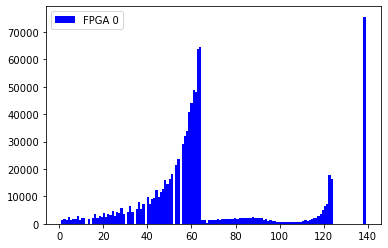

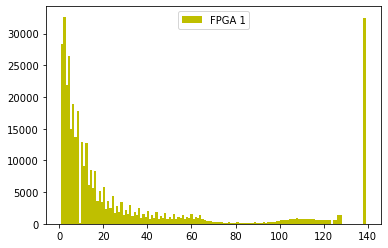

FPGA
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

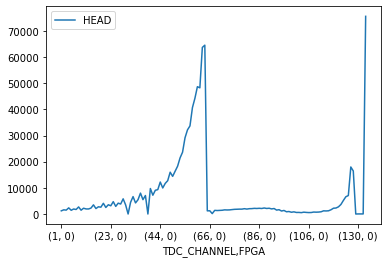

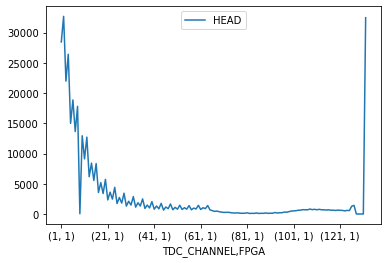

In [11]:
#7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel
import matplotlib.pyplot as plt
%matplotlib inline

n_ch=data["TDC_CHANNEL"].max()
plt.hist(data[data["FPGA"]==0]["TDC_CHANNEL"], color="b", bins=n_ch, label="FPGA 0")
plt.legend(loc="best")
plt.show()

plt.hist(data[data["FPGA"]==1]["TDC_CHANNEL"], color="y", bins=n_ch, label="FPGA 1")
plt.legend()
plt.show()

df3 = df.groupby(['TDC_CHANNEL','FPGA'])[['HEAD']].sum()
#IPython.display.display(df3)
df3.groupby(['FPGA']).plot()

In [168]:
#8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)
noisy_0=data[data["FPGA"]==0][["TDC_CHANNEL","timens"]].groupby("TDC_CHANNEL").count().nlargest(3,"timens").drop(axis=1, labels="timens")
noisy_1=data[data["FPGA"]==1][["TDC_CHANNEL","timens"]].groupby("TDC_CHANNEL").count().nlargest(3,"timens").drop(axis=1, labels="timens")

print("The 3 noisiest channels for FPGA_0 are \n")
noisy_0
#print("\n")

data[data["FPGA"]==0][["TDC_CHANNEL","timens"]].groupby("TDC_CHANNEL").sum().nlargest(3,"timens") 
#error: if .groupby("TDC_CHANNEL","timens") for groupby something has to remain as a clm
#.count() is an int since "counts" how many times a value is in that class

The 3 noisiest channels for FPGA_0 are 



,timens
TDC_CHANNEL,
1,652.998595
2,876.071739
3,789.647638
4,1280.544831
5,758.074189
...,...
129,0.444487
130,18.099860
137,18.574607


In [8]:
print("The 3 noisiest channels for FPGA_1 are \n")
noisy_1

The 3 noisiest channels for FPGA_1 are 



""
TDC_CHANNEL
2
139
1


In [186]:
#9a: Count the number of unique orbits. 
unique_orbits=data.groupby("ORBIT_CNT").count()
#unique_orbits
len(unique_orbits)

#ALSO
#data["ORBIT_CNT"].nunique() #since they are all distinct for .gby action

11001

In [181]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 1, 1]})
df.nunique()

A    3
B    1
dtype: int64

In [27]:
#Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139
data[data["TDC_CHANNEL"]==139]["ORBIT_CNT"].nunique()

#len(unique_orbits[unique_orbits["TDC_CHANNEL"]==139])

10976